# Correlate footprints between 10x and Hydropv2

In [1]:
import os
import anndata
import pandas as pd
import crested

import scprinter as scp

2025-08-19 14:45:04.967 | WARNING  | crested.tl:<module>:25 - modiscolite is not installed, 'crested.tl.modisco' module will not be available.
/lustre1/project/stg_00002/mambaforge/vsc35862/envs/scprinter/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
zip_folder = "../../../../../../data/hydrop/fly_embryo/paper_zips"
printer_hydrop_object_path = f"{zip_folder}/10x_hydropv2_comparisons_data/printer/printer_fly_hydropv2.h5ad"
printer_10x_object_path = f"{zip_folder}/10x_hydropv2_comparisons_data/printer/printer_fly_10x.h5ad"
barcodegroups_10x_path = f"{zip_folder}/10x_hydropv2_comparisons_data/printer/barcodegroups_fly_10x.csv"
barcodegroups_hydrop_path = f"{zip_folder}/10x_hydropv2_comparisons_data/printer/barcodegroups_fly_hydropv2.csv"

In [3]:
fa_file_path = "../../../../../../../../../res_00001/genomes/drosophila_melanogaster/dm6_cellranger/indexes/bwa2/2.2.1/genome.fa"
precomputed_bias_path = "../../../../../../data/PRINT/biases/dm6Tn5Bias.tar.gz.untar/dm6Tn5Bias.h5" # download from scprinter Zenodo or create one with scp.genome.predict_genome_tn5_bias

genome = scp.genome.Genome(
    name="dm6",
    fa_file=fa_file_path,
    bias_file=precomputed_bias_path,
)

In [4]:
printer_hydrop = scp.load_printer(printer_hydrop_object_path, genome)
printer_10x = scp.load_printer(printer_10x_object_path, genome)

In [5]:
barcodegroups_hydrop = pd.read_csv(barcodegroups_hydrop_path, header=0, sep="\t")
barcodegroups_10x = pd.read_csv(barcodegroups_10x_path, header=0, sep="\t")

In [6]:
barcodegroups_hydrop.head(10)

,obs_name,cell_type
0,AAGCAGATAGACGTTCGCACAGAGGAATCCpart2,Neuronal
1,AAGCAGATAGATCGCTGCTCGATCTAGGTApart2,Neuronal
2,AAGCAGATAGCCGTACCTATTGAATCCAAGpart2,Epidermis
3,AAGCAGATAGCCGTTGGTTGAGGACATGAApart2,NA_lowQ
4,AAGCAGATAGCCGTTGGTTGTAGTGGTAATpart2,Epidermis
5,AAGCAGATAGCGAGTATTGGCTCCTGAATCpart2,Neuronal
6,AAGCAGATAGCGATAGCGGAGCTGACGAACpart2,Midgut
7,AAGCAGATAGCTGATTATGTTAGTACCGTCpart2,Fat_body
8,AAGCAGATAGGCTCGTTCATCGATCTCAGApart2,NA_lowQ
9,AAGCAGATAGGGACCAAGTGTAGTGGTAATpart2,PNS_sens_neurons


In [7]:
barcodegroups_10x["cell_type"] = barcodegroups_10x.cell_type.astype(str)
barcodegroups_10x["obs_name"] = barcodegroups_10x.obs_name.astype(str)

barcodegroups_hydrop["cell_type"] = barcodegroups_hydrop.cell_type.astype(str)
barcodegroups_hydrop["obs_name"] = barcodegroups_hydrop.obs_name.astype(str)

In [8]:
cell_grouping_hydrop, group_names_hydrop = scp.utils.df2cell_grouping(printer_hydrop, barcodegroups_hydrop)
cell_grouping_10x, group_names_10x = scp.utils.df2cell_grouping(printer_10x, barcodegroups_10x)

In [9]:
def convert_region_to_width(region, width: int = 1840):
    start, end = region.split(":")[1].split("-")
    start = int(start)
    end = int(end)
    center = (start + end) // 2
    start = center - width // 2
    end = center + width // 2
    return f"{region.split(':')[0]}:{start}-{end}"

In [10]:
# stark enhancer regions with their annotations
regions_of_interest_unchanged = [
    "chr2L:2163674-2165773", "chr2L:21843469-21845803", "chr2R:9930287-9932397",
    "chr2R:10459397-10461789", "chr2R:11194318-11196390", "chr2R:12593526-12595724",
    "chr2L:3113886-3116075", "chr2R:14173216-14175346", "chr2R:14334875-14336968",
    "chr2R:15897411-15899572", "chr2R:16783707-16785865", "chr2R:18338586-18340728",
    "chr2R:19107715-19109845", "chr2R:19819410-19821552", "chr2R:20026362-20028504",
    "chr2R:20597698-20599839", "chr2R:22802043-22803585", "chr2R:23049881-23051973",
    "chr2R:23592106-23594358", "chr2R:24327840-24330065", "chr2R:24807620-24809727",
    "chr2R:25106786-25108894", "chr3L:373888-375960", "chr3L:1095173-1097593",
    "chr3L:1322658-1324778", "chr3L:6806613-6808816", "chr3L:10351940-10354125",
    "chr3L:12693742-12696663", "chr2L:6073895-6076535", "chr3L:15763704-15765967",
    "chr3L:16043310-16045539", "chr3L:18787471-18789555", "chr3R:4451213-4453364",
    "chr3R:8787084-8789298", "chr3R:10513249-10515382", "chr3R:10569672-10571928",
    "chr3R:12621701-12623889", "chr3R:12644407-12646146", "chr3R:12645563-12648106",
    "chr3R:12648083-12650858", "chr3R:13428001-13428951", "chr3R:13448589-13450735",
    "chr3R:15307864-15310235", "chr3R:16005428-16007531", "chr2L:8421920-8424099",
    "chr3R:16699060-16701215", "chr3R:16700797-16702888", "chr3R:16890314-16892448",
    "chr3R:16936443-16938643", "chr3R:16950676-16952842", "chr2L:8578321-8580523",
    "chr3R:18695700-18697823", "chr3R:19300581-19302962", "chr3R:19314425-19316666",
    "chr2L:8841573-8843738", "chr3R:22168686-22170923", "chr3R:22253586-22255816",
    "chr3R:25171908-25174205", "chr3R:25632148-25634323", "chr3R:26026378-26028970",
    "chr3R:26064120-26066252", "chr3R:28588434-28590577", "chr3R:28592856-28595111",
    "chr3R:29562062-29564342", "chr3R:29983451-29986358", "chr3R:30923617-30925849",
    "chrX:337253-339335", "chrX:2651914-2654026", "chrX:5054760-5056847",
    "chrX:8354492-8356703", "chrX:8882617-8884691", "chrX:9059967-9062117",
    "chrX:16169462-16171589", "chr2L:12589222-12591343", "chrX:20651972-20654082",
    "chr2L:14485084-14487223", "chr2L:15480181-15482932", "chr2L:16317691-16319794",
    "chr2L:17748587-17750842", "chr2L:18890105-18892283"
] 
regions_of_interest_unchanged = [region[3:] for region in regions_of_interest_unchanged]
regions_of_interest_500 = [convert_region_to_width(region, 500) for region in regions_of_interest_unchanged]

In [11]:
# stark enhancer annotations per region
classes_of_interest = [
    "Neuronal", "Midgut", "NA", "Hindgut", "Midgut", 
    ["Epidermis", "Head_Ectoderm", "Pharynx", "Hindgut"], 
    "Salivary_gland", "NA", "NA", 
    ["Neuronal", "Malpighian_tubule"], 
    ["Yolk", "Hemocytes"], 
    "Neuronal", "Epidermis", "Tracheal_system", "Neuronal", "Neuronal", 
    "NA", "NA", 
    ["Neuronal", "Midgut", "Epidermis"], 
    "NA", "NA", "Epidermis", 
    ["Neuronal", "Salivary_gland"], 
    ["Epidermis", "Midgut"], 
    "Epidermis", "Epidermis", 
    ["Neuronal", "Somatic_muscles"], 
    "Midgut", 
    ["Midgut", "Neuronal"], 
    "Midgut", 
    ["Neuronal", "Neuroblasts"], 
    ["Salivary_gland", "Fat_body"], 
    ["Midgut", "Epidermis"], 
    "Epidermis", "Midgut", 
    ["Neuronal", "Neuroblasts"], 
    "Salivary_gland", 
    ["Pharynx", "Hindgut"], 
    "Midgut", "Neuronal", "NA", 
    "Visceral_muscles", 
    "Somatic_muscles", 
    ["Midgut", "Salivary_gland", "Malpighian_tubule"], 
    ["Neuronal", "Neuroblasts", "Hemocytes"], 
    ["Salivary_gland", "Neuronal"], 
    "Neuronal", 
    ["Neuronal", "Neuroblasts", "Epidermis"], 
    "Epidermis", 
    ["Pharynx", "Epidermis"], 
    "Epidermis", "Pharynx", 
    ["Pharynx", "Midgut"], 
    ["Neuronal", "Neuroblasts"], 
    "Neuronal", "Epidermis", 
    "PNS_sens_neurons", 
    "NA", "Neuronal", 
    ["Neuronal", "PNS_sens_neurons"], 
    "Salivary_gland", 
    ["Midgut", "Neuronal"], 
    "Neuronal", "Epidermis", 
    ["Epidermis", "Pharynx"], 
    "Midgut", 
    ["Epidermis", "Salivary_gland"], 
    ["Pharynx", "Epidermis"], 
    "Epidermis", "Epidermis", 
    ["Midgut", "Pharynx"], 
    ["Midgut", "Epidermis"], 
    "Visceral_muscles", 
    ["Midgut", "Salivary_gland"], 
    ["Neuronal", "Neuroblasts"], 
    "Epidermis", "NA", 
    ["Hindgut", "Midgut", "Salivary_gland"], 
    "NA", 
    ["Neuronal", "Neuroblasts", "Epidermis"]
]

In [12]:
# stark enhancer IDs
IDs = ["VT1083", "VT11145", "VT14335", "VT14616"
    ,"VT14978"
    ,"VT15726"
    ,"VT1597"
    ,"VT16530"
    ,"VT16613"
    ,"VT17409"
    ,"VT17873"
    ,"VT18684"
    ,"VT19073"
    ,"VT19429"
    ,"VT19535"
    ,"VT19841"
    ,"VT21015"
    ,"VT21151"
    ,"VT21433"
    ,"VT21819"
    ,"VT22068"
    ,"VT22223"
    ,"VT23462"
    ,"VT23835"
    ,"VT23951"
    ,"VT26739"
    ,"VT28557"
    ,"VT29804"
    ,"VT3067"
    ,"VT31409"
    ,"VT31552"
    ,"VT32972"
    ,"VT36347"
    ,"VT38601"
    ,"VT39498"
    ,"VT39530"
    ,"VT40599"
    ,"VT40610"
    ,"VT40611"
    ,"VT40612"
    ,"VT41025"
    ,"VT41037"
    ,"VT42009"
    ,"VT42358"
    ,"VT4243"
    ,"VT42746"
    ,"VT42747"
    ,"VT42831"
    ,"VT42855"
    ,"VT42863"
    ,"VT4320"
    ,"VT43781"
    ,"VT44101"
    ,"VT44107"
    ,"VT4448"
    ,"VT45611"
    ,"VT45651"
    ,"VT47167"
    ,"VT47408"
    ,"VT47619"
    ,"VT47640"
    ,"VT48943"
    ,"VT48946"
    ,"VT49445"
    ,"VT49668"
    ,"VT50195"
    ,"VT54783"
    ,"VT55906"
    ,"VT57083"
    ,"VT58723"
    ,"VT58999"
    ,"VT59092"
    ,"VT62606"
    ,"VT6436"
    ,"VT64887"
    ,"VT7402"
    ,"VT7922"
    ,"VT8346"
    ,"VT9081"
    ,"VT9675"
]

In [13]:
assert len(regions_of_interest_500) == len(classes_of_interest) == len(IDs)

## Get footprints scores

In [14]:
printer_hydrop.load_disp_model()
printer_hydrop.load_bindingscore_model("TF", scp.datasets.pretrained_TFBS_model)
printer_hydrop.load_bindingscore_model("Nuc",scp.datasets.pretrained_NucBS_model)

printer_10x.load_disp_model()
printer_10x.load_bindingscore_model("TF", scp.datasets.pretrained_TFBS_model)
printer_10x.load_bindingscore_model("Nuc",scp.datasets.pretrained_NucBS_model)

In [15]:
# hydrop footprint scores for all classes for regions of interest
import time
import numpy as np

start = time.time()
scp.tl.get_footprint_score(
    printer_hydrop,
    cell_grouping_hydrop,
    group_names_hydrop,
    regions_of_interest_500,
    modes=np.arange(2, 101),
    footprintRadius=None,
    flankRadius=None,
    n_jobs=16,
    save_key="500_footprints",
    backed=False, # leads to corrupted files
    overwrite=True)
print ("takes", time.time()-start)

estimated file size: 0.31 GB
Creating 500_footprints in printer.footprintsadata
obs=groups, var=regions
761 100
Loading insertion profiles


collecting multi-scale footprints: 100%|██████████| 7920/7920 [02:48<00:00, 46.87it/s] 

takes 322.7056939601898


In [16]:
# 10x footprints
start = time.time()
scp.tl.get_footprint_score(
    printer_10x,
    cell_grouping_10x,
    group_names_10x,
    regions_of_interest_500,
    modes=np.arange(2, 101),
    footprintRadius=None,
    flankRadius=None,
    n_jobs=16,
    save_key="500_footprints",
    backed=False, # leads to corrupted files
    overwrite=True)
print ("takes", time.time()-start)

estimated file size: 0.31 GB
Creating 500_footprints in printer.footprintsadata
obs=groups, var=regions
761 100
Loading insertion profiles


collecting multi-scale footprints: 100%|██████████| 7920/7920 [02:30<00:00, 52.51it/s] 

takes 250.4673147201538


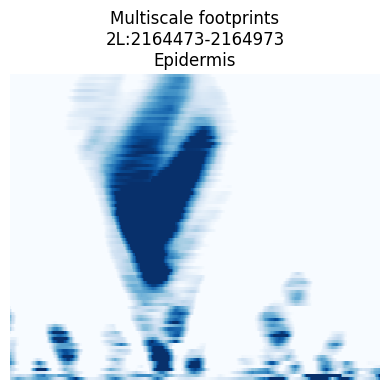

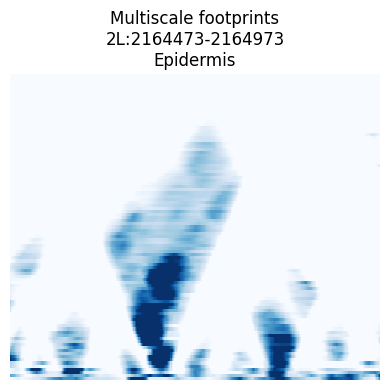

In [69]:
## test plots
%matplotlib inline
scp.pl.plot_footprints(
    printer_hydrop,
    save_key="500_footprints",
    group_names="Epidermis",
    region=regions_of_interest_500[0],
    scales=None,
    ax=None,
    cmap="Blues",
    vmin=0.5,
    vmax=2.0,
)
scp.pl.plot_footprints(
    printer_10x,
    save_key="500_footprints",
    group_names="Epidermis",
    region=regions_of_interest_500[0],
    scales=None,
    ax=None,
    cmap="Blues",
    vmin=0.5,
    vmax=2.0,
)

In [18]:
printer_hydrop.footprintsadata["500_footprints"].obsm["2L:2164473-2164973"].shape # (C, H, W)

(21, 99, 500)

In [102]:
%matplotlib inline
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

def compare_footprint_technologies(printer_10x, printer_hydrop, region_key, 
                                 cell_type_names=None, save_path=None, show=True):
    """
    Compare total footprint scores between two technologies for a given region.
    """
    # Extract footprint tensors for the region
    footprints_10x = printer_10x.footprintsadata["500_footprints"].obsm[region_key]  # (C, H, W)
    footprints_hydrop = printer_hydrop.footprintsadata["500_footprints"].obsm[region_key]  # (C, H, W)
    
    assert footprints_10x.shape == footprints_hydrop.shape, \
        f"Shape mismatch: 10x {footprints_10x.shape} vs Hydrop {footprints_hydrop.shape}"
    
    C, H, W = footprints_10x.shape
    
    # Sum across height and width dimensions to get total score per cell type
    total_scores_10x = np.sum(footprints_10x, axis=(1, 2))  # Shape: (C,)
    total_scores_hydrop = np.sum(footprints_hydrop, axis=(1, 2))  # Shape: (C,)
    
    if cell_type_names is None:
        cell_type_names = [f"Cell_Type_{i+1}" for i in range(C)]
    
    comparison_df = pd.DataFrame({
        'cell_type': cell_type_names[:C],  
        'total_score_10x': total_scores_10x,
        'total_score_hydrop': total_scores_hydrop,
        'region': region_key
    })
    
    # Calculate correlation
    correlation, p_value = pearsonr(total_scores_10x, total_scores_hydrop)
    
    if show:
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(total_scores_10x, total_scores_hydrop, 
                            alpha=0.7, s=60, c=range(C))
        
        # Formatting
        plt.xlabel('10x Technology - Total Footprint Score', fontsize=12)
        plt.ylabel('Hydrop Technology - Total Footprint Score', fontsize=12)
        plt.title(f'Footprint Score Comparison: 10x vs Hydrop\nRegion: {region_key}\n'
                f'Correlation: r={correlation:.3f}, p={p_value:.2e}', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        plt.axis('equal')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    return comparison_df

def compare_multiple_regions(printer_10x, printer_hydrop, region_keys, 
                           cell_type_names=None, save_path=None):
    """
    Compare footprint scores across multiple regions.
    """
    
    all_comparisons = []
    
    for region_key in region_keys:
        comparison_df = compare_footprint_technologies(
            printer_10x, printer_hydrop, region_key, 
            cell_type_names, save_path=None, show=False
        )
        all_comparisons.append(comparison_df)
    combined_df = pd.concat(all_comparisons, ignore_index=True)

    plt.figure(figsize=(10, 10))
    
    for i, region_key in enumerate(region_keys):
        region_data = combined_df[combined_df['region'] == region_key]
        plt.scatter(region_data['total_score_hydrop'], region_data['total_score_10x'], 
                   alpha=0.8, s=20, c="#1f77b4")
    
    overall_corr, overall_p = pearsonr(combined_df['total_score_10x'], 
                                      combined_df['total_score_hydrop'])
    
    # Add regression line
    z = np.polyfit(combined_df['total_score_hydrop'], combined_df["total_score_10x"], 1)
    p = np.poly1d(z)
    x_sorted = np.sort(combined_df['total_score_hydrop'])
    plt.plot(x_sorted, p(x_sorted), alpha=0.8, linewidth=1, c="black",
             label=f'r={overall_corr:.3f}')
    # Add text box with correlation info
    textstr = f'r = {overall_corr:.3f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    plt.text(0.80, 0.20, textstr, transform=plt.gca().transAxes, fontsize=14,
             verticalalignment='top', bbox=props)

    plt.xlabel('HyDropv2', fontsize=12)
    plt.ylabel('10x', fontsize=12)
    plt.title(f'Footprint Score Comparison: 10x vs Hydrop (Stark Regions)')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=500, bbox_inches='tight', format="pdf")
    
    plt.show()
    
    return combined_df

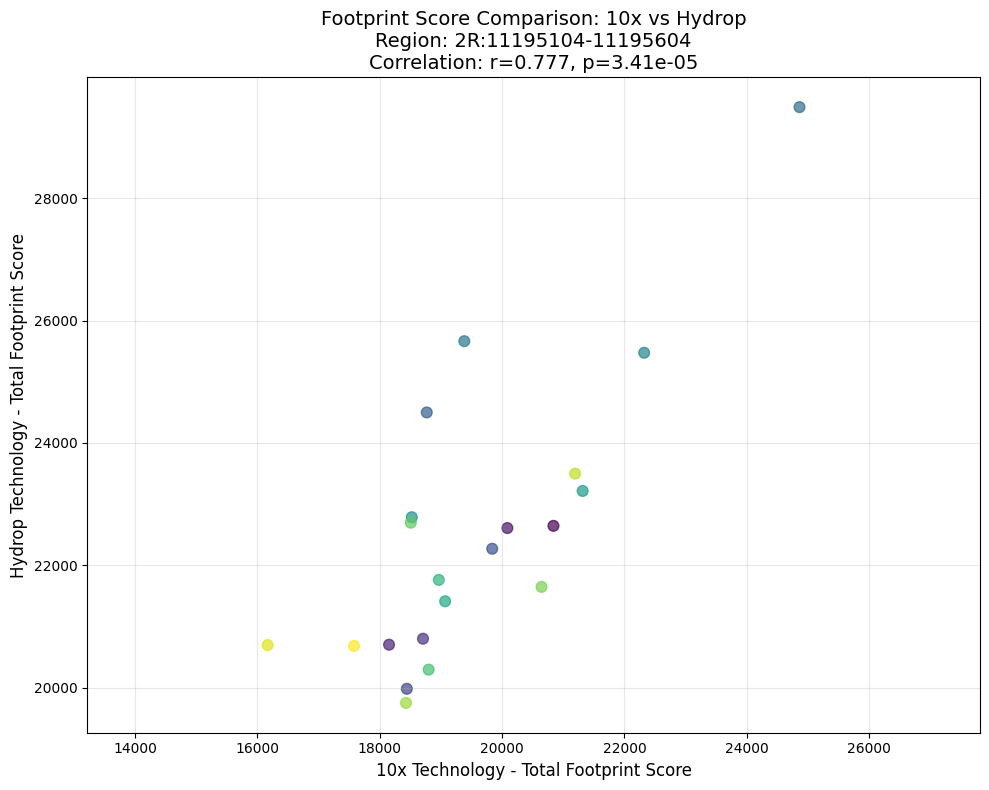

In [36]:
# single region comparison accross cell types
comp = compare_footprint_technologies(
    printer_10x, 
    printer_hydrop, 
    region_key=regions_of_interest_500[4], 
    cell_type_names=None, 
    save_path=None
)

2025-08-19 16:32:08 - INFO - maxp pruned
2025-08-19 16:32:09 - INFO - cmap pruned
2025-08-19 16:32:09 - INFO - kern dropped
2025-08-19 16:32:09 - INFO - post pruned
2025-08-19 16:32:09 - INFO - FFTM dropped
2025-08-19 16:32:09 - INFO - GPOS pruned
2025-08-19 16:32:09 - INFO - GSUB pruned
2025-08-19 16:32:09 - INFO - glyf pruned
2025-08-19 16:32:09 - INFO - Added gid0 to subset
2025-08-19 16:32:09 - INFO - Added first four glyphs to subset
2025-08-19 16:32:09 - INFO - Closing glyph list over 'MATH': 40 glyphs before
2025-08-19 16:32:09 - INFO - Glyph names: ['.notdef', '.null', 'C', 'D', 'F', 'H', 'R', 'S', 'a', 'c', 'colon', 'd', 'e', 'equal', 'five', 'four', 'g', 'i', 'k', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'v', 'x', 'y', 'zero']
2025-08-19 16:32:09 - INFO - Glyph IDs:   [0, 1, 2, 3, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 32, 38, 39, 41, 43, 53, 54, 68, 70, 71, 72, 74, 76, 

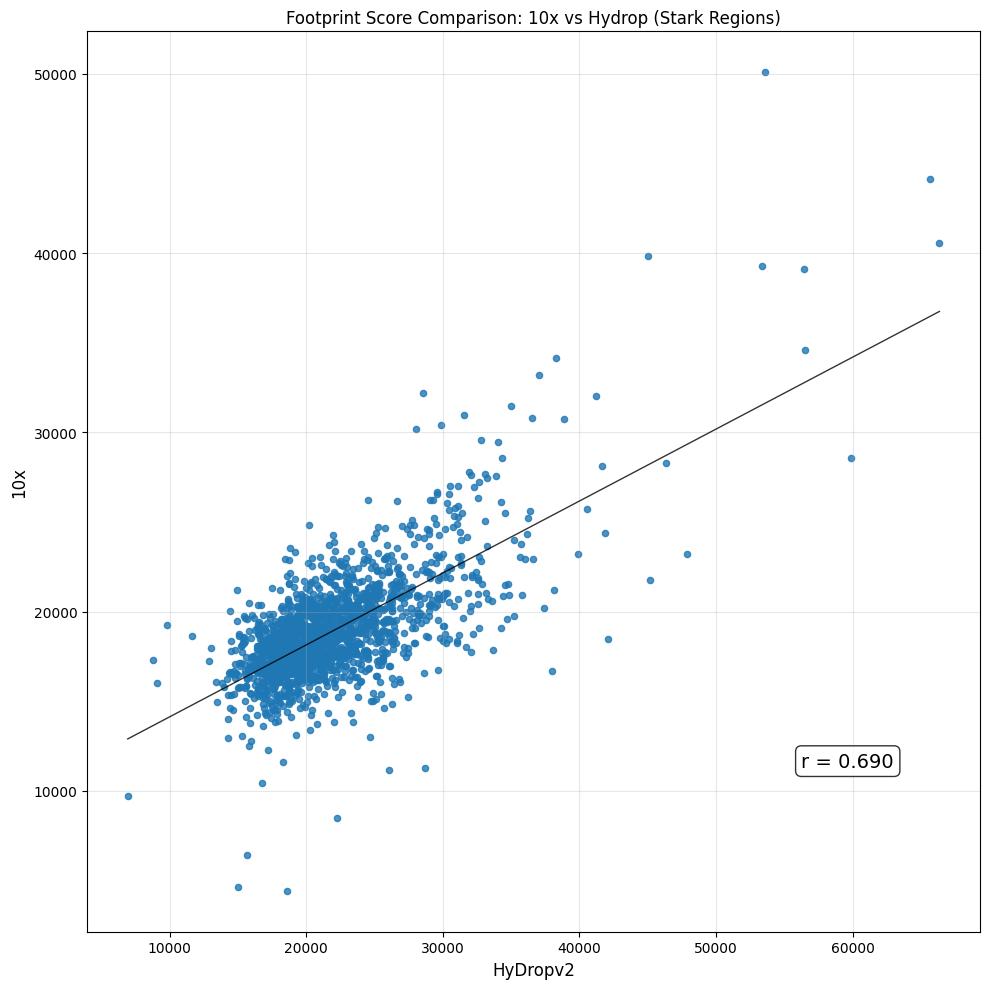

In [104]:
comp = compare_multiple_regions(
    printer_10x, 
    printer_hydrop, 
    region_keys=regions_of_interest_500, 
    cell_type_names=None, 
    save_path="footprint_comparison_stark_regions.pdf"
)

In [105]:
printer_hydrop.close()
time.sleep(1)
printer_10x.close()
time.sleep(1)